In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('/Users/cenkerarin/ml_test/datasets/Salary_Data.csv')


Model Parameters:
Intercept (θ0): 25792.20
Slope (θ1): 9449.96

Model Performance:
Mean Squared Error: 31270951.72
R-squared Score: 0.9570


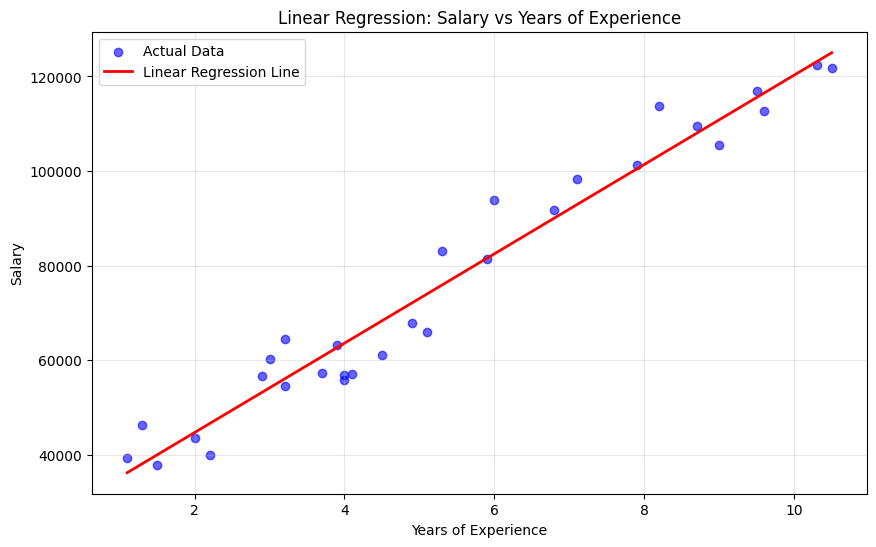

In [5]:
X = data.iloc[:, 0].values  
y = data.iloc[:, 1].values  

X_with_bias = np.column_stack([np.ones(len(X)), X])

# Linear Regression using Normal Equation: θ = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

print(f"\nModel Parameters:")
print(f"Intercept (θ0): {theta[0]:.2f}")
print(f"Slope (θ1): {theta[1]:.2f}")

y_pred = X_with_bias @ theta

# Calculate metrics
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

mse = mean_squared_error(y, y_pred)
r2 = r_squared(y, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Function to make predictions for new data
def predict_salary(years_experience):
    return theta[0] + theta[1] * years_experience

new_experience = 5.5
# predicted_salary = predict_salary(new_experience)
# print("predict_salary")